/tmp/ipykernel_1959102/2370221246.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('cool')  # You can choose any colormap


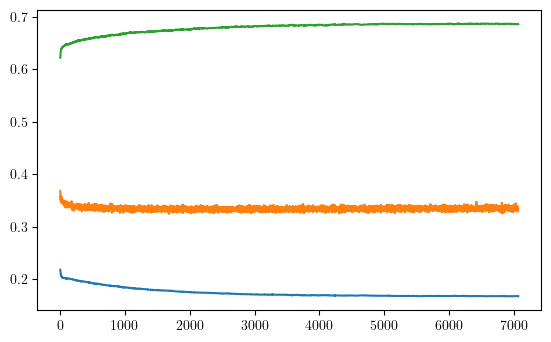

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd

ce_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_56_53.794+02_00.csv")
# dice_loss = pd.read_csv("")
dice_score = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_21_41.950+02_00.csv")
mse_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_22_31.002+02_00.csv")

for column in ce_loss.columns:
    if "val/ce_loss" in column:
        ce_series = ce_loss[column]
for column in dice_score.columns:
    if "val/global_dice" in column:
        dice_series = dice_score[column]
for column in mse_loss.columns:
    if "val/mse_loss" in column:
        mse_series = mse_loss[column]

FONT_SIZE = 10

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005"]
categories1 = [r"$\texttt{"+elem+"}$" for elem in categories1]
categories2 = ["Rory", "C. reinhardtii", "Synthetic", "NOT S. oleracea"]

baseline1 = np.array([0.54, 0.33, 0.32, 0.41, 0.23, 0.76, 0.63])[::-1]
improvements1 = (np.array([0.62, 0.63, 0.51, 0.47, 0.45, 0.77, 0.65])[::-1] - baseline1)
f2fd_segm1 = np.array([0.66, 0.66, 0.44, 0.58, 0.65, 0.81, 0.66])[::-1]
segm1 = np.array([0.67, 0.69, 0.46, 0.58, 0.63, 0.72, 0.59])[::-1]

baseline2 = np.array([0.64, 0.59, 0.51, 0.62])[::-1]
improvements2 = (np.array([0.74, 0.68, 0.54, 0.66])[::-1] - baseline2)
f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])[::-1]
segm2 = np.array([0.93, 0.91, 0.905, 0.87])[::-1]


matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5


BOXPLOT_MEAN_PROPS = dict(marker='o', markerfacecolor='orange', markeredgecolor='black', markersize=2)
BOXPLOT_MEDIAN_PROPS = dict(color="black", markersize=2)
# to rgb
BOXPLOT_COLOR = "#40C0FE"

width = 1*TEXTWIDTH
height = 3.9
font_size = FONT_SIZE
bar_font_size = font_size-4
figlabel = ""

bar_height = 0.8
bar_width = 0.8
method_group_spacing = 3.4  # Keeping group spacing large for separation

in_group_spacing = 0.0 # Small space between bars within each group
ytick_labels = []  # List to hold the PDB names under each group of bars

fig, axes = plt.subplots(1, 1, figsize=(width, height))

colors_green = ["#edf8e9", "#bae4b3", "#74c476", "#238b45"]
colormap = cm.get_cmap('cool')  # You can choose any colormap
norm = Normalize(vmin=-1, vmax=3-1)

axes.plot(ce_series)
axes.plot(mse_series)
axes.plot(dice_series)

if FONT_SIZE != 11:
    filename = "plots/master/losses_long.pdf"

fig.savefig(filename, bbox_inches='tight', pad_inches=0)

plt.show()

(7073,)
(7074, 4)
(7073, 7)


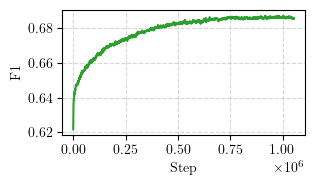

/tmp/ipykernel_132203/1648543545.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


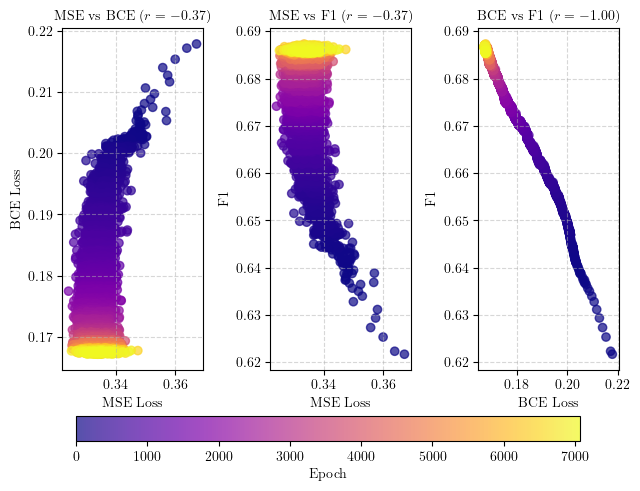

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd

# === Load your data ===
ce_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_56_53.794+02_00.csv")
dice_score = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_21_41.950+02_00.csv")
mse_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_22_31.002+02_00.csv")

steps = dice_score["Step"][:7073]

for column in ce_loss.columns:
    if "val/ce_loss" in column:
        ce_series = ce_loss[column].dropna().reset_index(drop=True)[:7073]
        print(np.array(ce_series).shape)
        break
for column in dice_score.columns:
    if "val/global_dice" in column:
        dice_series = dice_score[column].dropna().reset_index(drop=True)[:7073]
        print(np.array(dice_score).shape)
        break
for column in mse_loss.columns:
    if "val/mse_loss" in column:
        mse_series = mse_loss[column].dropna().reset_index(drop=True)
        print(np.array(mse_loss).shape)
        break
FONT_SIZE = 10
font_size = FONT_SIZE
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5

width = 1*TEXTWIDTH
height = 3.9
# height = 7

# === Compute correlations ===
corr_ce = np.corrcoef(ce_series, dice_series)[0, 1]
corr_mse = np.corrcoef(mse_series, dice_series)[0, 1]

# === 1. Dual-y plot (losses vs dice over epochs) ===
fig, ax1 = plt.subplots(figsize=(width * 0.5, height* 0.5))

# epochs = np.arange(len(ce_series))

# ax1.plot(epochs, ce_series, label="BCE Loss", color="tab:blue")
# ax1.set_ylabel("Loss")
# ax1.set_xlabel("Epoch")
# ax1.legend(loc="upper left")

# ax2 = ax1.twinx()
ax1.plot(steps, dice_series, label="F1", color="tab:green")
ax1.set_ylabel("F1")
ax1.set_xlabel("Step")
# ax1.legend(loc="upper left")

ax1.grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]

# ax2 = ax1.twinx()
# ax2.plot(steps, mse_series, label="MSE Loss", color="tab:orange")


# Handle legends
lines1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(lines1, labels1, loc="center right")

fig.tight_layout()
fig.savefig("plots/master/dice_vs_step.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# === 2. Scatter plot (Loss vs Dice) with correlation ===
fig, axes = plt.subplots(1, 3, figsize=(width, height))

epochs = np.arange(len(ce_series))

sc1 = axes[2].scatter(ce_series, dice_series, c=epochs, cmap="plasma", alpha=0.7)
axes[2].set_xlabel("BCE Loss", fontsize=font_size)
axes[2].set_ylabel("F1", fontsize=font_size)
axes[2].set_title(fr"BCE vs F1 ($r={corr_ce:.2f}$)", fontsize=font_size)
# fig.colorbar(sc1, ax=axes[2], label="Epoch")

sc2 = axes[1].scatter(mse_series, dice_series, c=epochs, cmap="plasma", alpha=0.7)
axes[1].set_xlabel("MSE Loss", fontsize=font_size)
axes[1].set_ylabel("F1", fontsize=font_size)
axes[1].set_title(fr"MSE vs F1 ($r={corr_mse:.2f}$)", fontsize=font_size)
# fig.colorbar(sc2, ax=axes[1])

sc3 = axes[0].scatter(mse_series, ce_series, c=epochs, cmap="plasma", alpha=0.7)
axes[0].set_xlabel("MSE Loss", fontsize=font_size)
axes[0].set_ylabel("BCE Loss", fontsize=font_size)
axes[0].set_title(fr"MSE vs BCE ($r={corr_mse:.2f}$)", fontsize=font_size)
# fig.colorbar(sc2, ax=axes[0])

cbar = fig.colorbar(sc2, ax=axes, orientation="horizontal", anchor=(0, -5))
cbar.set_label("Epoch", fontsize=font_size)

axes[0].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
axes[1].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
axes[2].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
fig.tight_layout()
fig.savefig("plots/master/scatter_losses_vs_dice.pdf", bbox_inches="tight", pad_inches=0)
plt.show()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd

# === Load your data ===
losses = pd.read_csv("src/plots/wandb_export/wandb_export_2025-09-13T12_25_57.731+02_00.csv")

for column in mse_loss.columns:
    if "val/mse_loss" in column:
        mse_series = mse_loss[column].dropna().reset_index(drop=True)
        print(np.array(mse_loss).shape)
        break

mse_series = losses[""].dropna().reset_index(drop=True)
dice_series = losses["f2fd-spinach-sequential-d011d - val/global_dice"].dropna().reset_index(drop=True)

FONT_SIZE = 10
font_size = FONT_SIZE
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5

width = 1*TEXTWIDTH
height = 3.9
# height = 7

# === Compute correlations ===
corr_ce = np.corrcoef(ce_series, dice_series)[0, 1]
corr_mse = np.corrcoef(mse_series, dice_series)[0, 1]

# === 1. Dual-y plot (losses vs dice over epochs) ===
fig, ax1 = plt.subplots(figsize=(width * 0.5, height* 0.5))

# epochs = np.arange(len(ce_series))

# ax1.plot(epochs, ce_series, label="BCE Loss", color="tab:blue")
# ax1.set_ylabel("Loss")
# ax1.set_xlabel("Epoch")
# ax1.legend(loc="upper left")

# ax2 = ax1.twinx()
ax1.plot(steps, dice_series, label="F1", color="tab:green")
ax1.set_ylabel("F1")
ax1.set_xlabel("Step")
ax1.set_xlim(left=0)
# ax1.legend(loc="upper left")

ax1.grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]

# ax2 = ax1.twinx()
# ax2.plot(steps, mse_series, label="MSE Loss", color="tab:orange")


# Handle legends
lines1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(lines1, labels1, loc="center right")

fig.tight_layout()
fig.savefig("plots/master/f2fd_implicit.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [ ]:
import pandas as pd
dice_score = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_21_41.950+02_00.csv")


0           145
1           293
2           442
3           591
4           740
         ...   
7069    1053425
7070    1053574
7071    1053723
7072    1053872
7073    1054021
Name: Step, Length: 7074, dtype: int64

In [ ]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

def project_and_save(mrc_path, output_png):
    # Load the MRC file
    with mrcfile.open(mrc_path, permissive=True) as mrc:
        data = mrc.data.astype(np.float32)

    # Ensure it's binary (0/1), in case values are not strict
    data = (data > 0).astype(np.float32)

    print(data.shape)
    projection = data[80]
    # Sum along the first axis (z-axis projection)
    # projection = np.sum(data, axis=0)

    # Save projection as PNG
    plt.imsave(output_png, projection, cmap='gray')

if __name__ == "__main__":
    input_mrc = "/mnt/hdd_pool_zion/userdata/diyor/data/deepict/DEF/labels_pixel_10/TS_034_membranes_trimmed.mrc"
    # input_mrc = "/mnt/hdd_pool_zion/userdata/diyor/data/in_situ_reinhardtii/tomograms_pixel_10/01122021_BrnoKrios_arctis_lam1_pos4.mrc"
    # input_mrc = "/mnt/hdd_pool_zion/userdata/diyor/data/in_situ_reinhardtii/labels_pixel_10/01122021_BrnoKrios_arctis_lam1_pos4_memb.mrc"
    output_png = "def_034_d.png"
    project_and_save(input_mrc, output_png)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/hdd_pool_zion/userdata/diyor/data/deepict/DEF/labels_pixel_10/TS_34_membranes_trimmed.mrc'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load your PNG as an array (assuming grayscale labels)
img = plt.imread("rory_gt.png")

# If it's read as floats [0,1], scale back to integers
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Make sure it's 2D (if RGBA, take one channel)
if img.ndim == 3:
    img = img[:, :, 0]

# Define custom colormap: 0=black, 1=white, 2=green
cmap = ListedColormap(["black", "white", "green"])
# print(np.unique(img))
# Plot without axes
plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
plt.axis("off")

# Save as PNG
plt.savefig("rory_gt_colored.png", bbox_inches="tight", pad_inches=0)
plt.close()


(160, 160, 3)


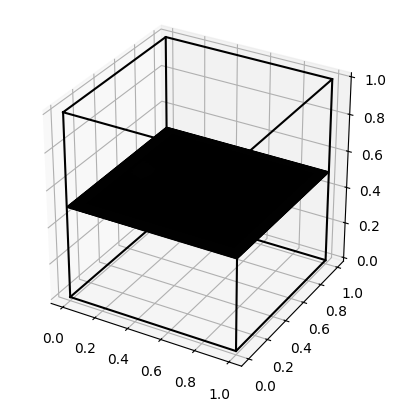

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.image as mpimg

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Cube vertices
r = [0, 1]
verts = [[(x,y,z) for x in r for y in r for z in [z0]]
         for z0 in r]

# Draw cube wireframe
ax.plot([0,1,1,0,0], [0,0,1,1,0], [0,0,0,0,0], color='k')
ax.plot([0,1,1,0,0], [0,0,1,1,0], [1,1,1,1,1], color='k')
ax.plot([0,0], [0,0], [0,1], color='k')
ax.plot([1,1], [0,0], [0,1], color='k')
ax.plot([0,0], [1,1], [0,1], color='k')
ax.plot([1,1], [1,1], [0,1], color='k')

# Load image
img = mpimg.imread("rory_gt.png")
print(img.shape)

# Show image slice in the cube (at z=0.5 plane)
x = np.linspace(0,1,img.shape[1])
y = np.linspace(0,1,img.shape[0])
x, y = np.meshgrid(x, y)
z = np.full_like(x, 0.5)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=(img[:, :, :3]/255.0).tolist())

ax.set_box_aspect([1,1,1])
plt.show()


(160, 160, 3)


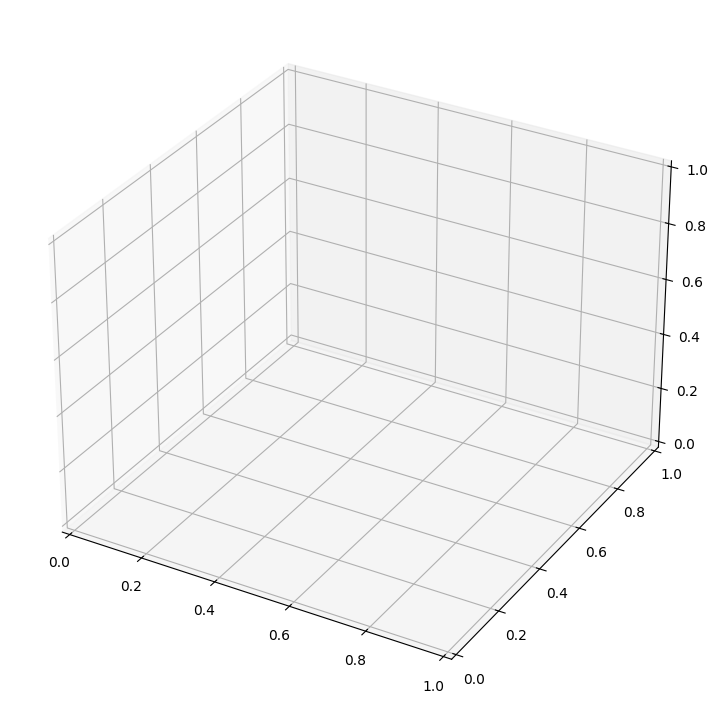

In [16]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt

C = image.imread('rory_gt.png')
print(C.shape)

xp, yp, __ = C.shape

x = np.arange(0, xp, 1)
y = np.arange(0, yp, 1)
Y, X = np.meshgrid(y, x)

fig = plt.figure(figsize=(12,9))
axe = fig.add_subplot(projection = '3d')
# ax.dist=6.2
# ax.view_init(elev=38, azim=-45)

ax.plot_surface(X, Y, X-X+yp, facecolors=C,
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(X, X-X, Y, facecolors=np.fliplr(C.transpose((1,0,2))),
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(X-X+xp, X, Y, facecolors=np.fliplr(C.transpose((1,0,2))),
                rstride=2, cstride=2,
                antialiased=True, shade=False)


[5.13939005e+05 9.62120622e+00 5.14096694e+05]
[1.12574768e+04 8.09016509e+00 1.13758863e+04]


/tmp/ipykernel_132203/3625056585.py:72: RuntimeWarning: overflow encountered in power
  return a * (x ** b) + c
/tmp/ipykernel_132203/3625056585.py:72: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b) + c


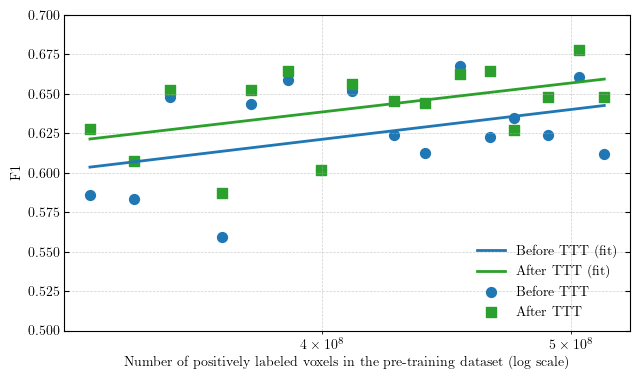

In [21]:
from scipy.optimize import curve_fit

dataset_sizes = [
    324903941,
    338114122,
    349077100,
    365789607,
    375213353,
    387849640,
    399479640,
    410779670,
    426771596,
    438860989,
    452523685,
    464925447,
    474936210,
    489716732,
    503770238,
    515172548,
]
f1_before = [
    0.58574,
    0.58366,
    0.64781,
    0.55959,
    0.64336,
    0.65861,
    0.60177,
    0.65195,
    0.62372,
    0.61252,
    0.66774,
    0.62251,
    0.63481,
    0.62414,
    0.66092,
    0.61214,
]
f1_after = [
    0.62769,
    0.60718,
    0.65269,
    0.58709,
    0.65261,
    0.6643,
    0.60158,
    0.65646,
    0.64525,
    0.64426,
    0.66253,
    0.6642,
    0.62734,
    0.64807,
    0.67741,
    0.6477,
]

FONT_SIZE = 10
font_size = FONT_SIZE
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5

width = 1*TEXTWIDTH
height = 3.9

# --- Define a power law function ---
def power_law(x, a, b, c):
    return a * (x ** b) + c

# Fit curve
params_before, cov_before = curve_fit(power_law, dataset_sizes, f1_before, maxfev=50000)
params_after, cov_after = curve_fit(power_law, dataset_sizes, f1_after, maxfev=50000)

sigma_before = np.sqrt(np.diag(cov_before))
sigma_after = np.sqrt(np.diag(cov_after))

print(sigma_before)
print(sigma_after)
n_samples = 1000
x_fit = np.logspace(np.log10(dataset_sizes[0]), np.log10(dataset_sizes[-1]), 200)

# # High-res x for smooth curve
# x_fit = np.logspace(np.log10(dataset_sizes[0]), np.log10(dataset_sizes[-1]), 200)


y_samples_before = np.zeros((n_samples, len(x_fit)))
for i in range(n_samples):
    sample_params = np.random.normal(params_before, sigma_before)
    y_samples_before[i] = power_law(x_fit, *sample_params)
y_lower_before = np.percentile(y_samples_before, 50.0, axis=0)
y_upper_before = np.percentile(y_samples_before, 50.0, axis=0)
y_fit_before = power_law(x_fit, *params_before)

# --- After TTT ---
y_samples_after = np.zeros((n_samples, len(x_fit)))
for i in range(n_samples):
    sample_params = np.random.normal(params_after, sigma_after)
    y_samples_after[i] = power_law(x_fit, *sample_params)
y_lower_after = np.percentile(y_samples_after, 50.0, axis=0)
y_upper_after = np.percentile(y_samples_after, 50.0, axis=0)
y_fit_after = power_law(x_fit, *params_after)

# Compute fitted y
# y_fit_before = power_law(x_fit, *params_before)
# y_fit_after = power_law(x_fit, *params_after)

fig, ax = plt.subplots(figsize=(width, height))

# Plot the fitted curves
ax.plot(x_fit, y_fit_before, color="#1f77b4", lw=2, label="Before TTT (fit)")
ax.plot(x_fit, y_fit_after, color="#2ca02c", lw=2, label="After TTT (fit)")

# Confidence intervals
ax.fill_between(x_fit, y_lower_before, y_upper_before, color="#1f77b4", alpha=0.2)
ax.fill_between(x_fit, y_lower_after, y_upper_after, color="#2ca02c", alpha=0.2)

# Optionally, plot data points with error bars
# ax.errorbar(dataset_sizes, f1_before, yerr=err_before, fmt='o', color="#1f77b4", capsize=3)
# ax.errorbar(dataset_sizes, f1_after, yerr=err_after, fmt='s', color="#2ca02c", capsize=3)
ax.scatter(dataset_sizes, f1_before, color="#1f77b4", marker='o', s=50, label="Before TTT")
ax.scatter(dataset_sizes, f1_after, color="#2ca02c", marker='s', s=50, label="After TTT")

# Log scale
ax.set_xscale("log")
ax.set_xlabel("Number of positively labeled voxels in the pre-training dataset (log scale)")
ax.set_ylabel("F1")
# ax.set_title("Scaling Law for TTT", pad=12)
ax.set_ylim([0.5, 0.7])

# Ticks and grid
ax.tick_params(direction="in", top=True, right=True)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

# Legend
ax.legend(frameon=False, loc="lower right")

plt.tight_layout()
plt.show()
fig.savefig("plots/master/scaling_law_power_law.pdf", dpi=300)